In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0,
)

loader = TextLoader("facts.txt")

# 1. docs = loader.load()
docs = loader.load_and_split(
    text_splitter=text_splitter
)

# 1. print(docs)
for doc in docs:
    print(doc.page_content)
    print("\n")

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()


embeddings = OpenAIEmbeddings()
emb = embeddings.embed_query("hi there")
print(emb)

# text_splitter = CharacterTextSplitter(
#     separator="\n",
#     chunk_size=200,
#     chunk_overlap=0,
# )

# loader = TextLoader("facts.txt")

# # 1. docs = loader.load()
# docs = loader.load_and_split(
#     text_splitter=text_splitter
# )

# # 1. print(docs)
# for doc in docs:
#     print(doc.page_content)
#     print("\n")

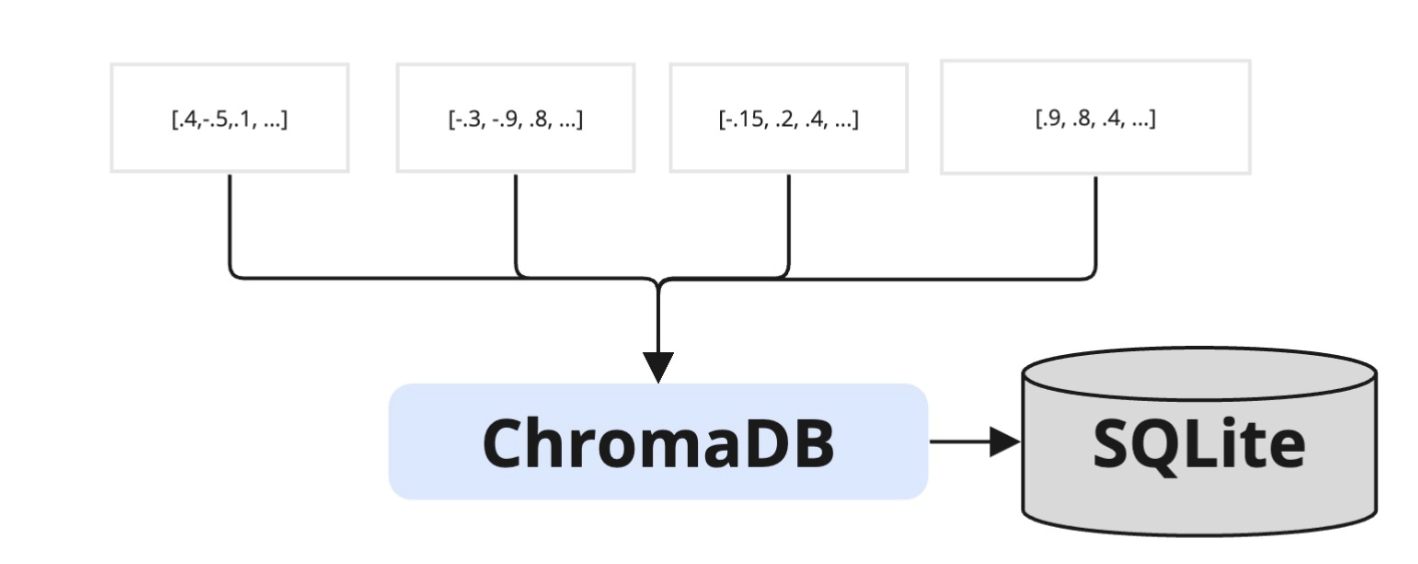

In [4]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores.chroma import Chroma 
from dotenv import load_dotenv

load_dotenv()

embeddings = OpenAIEmbeddings()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0,
)

loader = TextLoader("facts.txt")

docs = loader.load_and_split(
    text_splitter=text_splitter
)

db=Chroma.from_documents(
    docs, # 計算embbedings
    
    embedding=embeddings,
    persist_directory="emb"
)

# k 是輸出多少個相近結果  default=4
results = db.similarity_search_with_score("What is an interesting fact about the English language?",
                                          k=2 )

for result in results:
    print("\n")
    print(result[1])
    print(result[0].page_content)




0.3511408865451813
1. "Dreamt" is the only English word that ends with the letters "mt."
2. An ostrich's eye is bigger than its brain.
3. Honey is the only natural food that is made without destroying any kind of life.


0.3511408865451813
1. "Dreamt" is the only English word that ends with the letters "mt."
2. An ostrich's eye is bigger than its brain.
3. Honey is the only natural food that is made without destroying any kind of life.


- 每次都創建embedding存入vectorDB, 問題發生
![alt text](image-2.png)

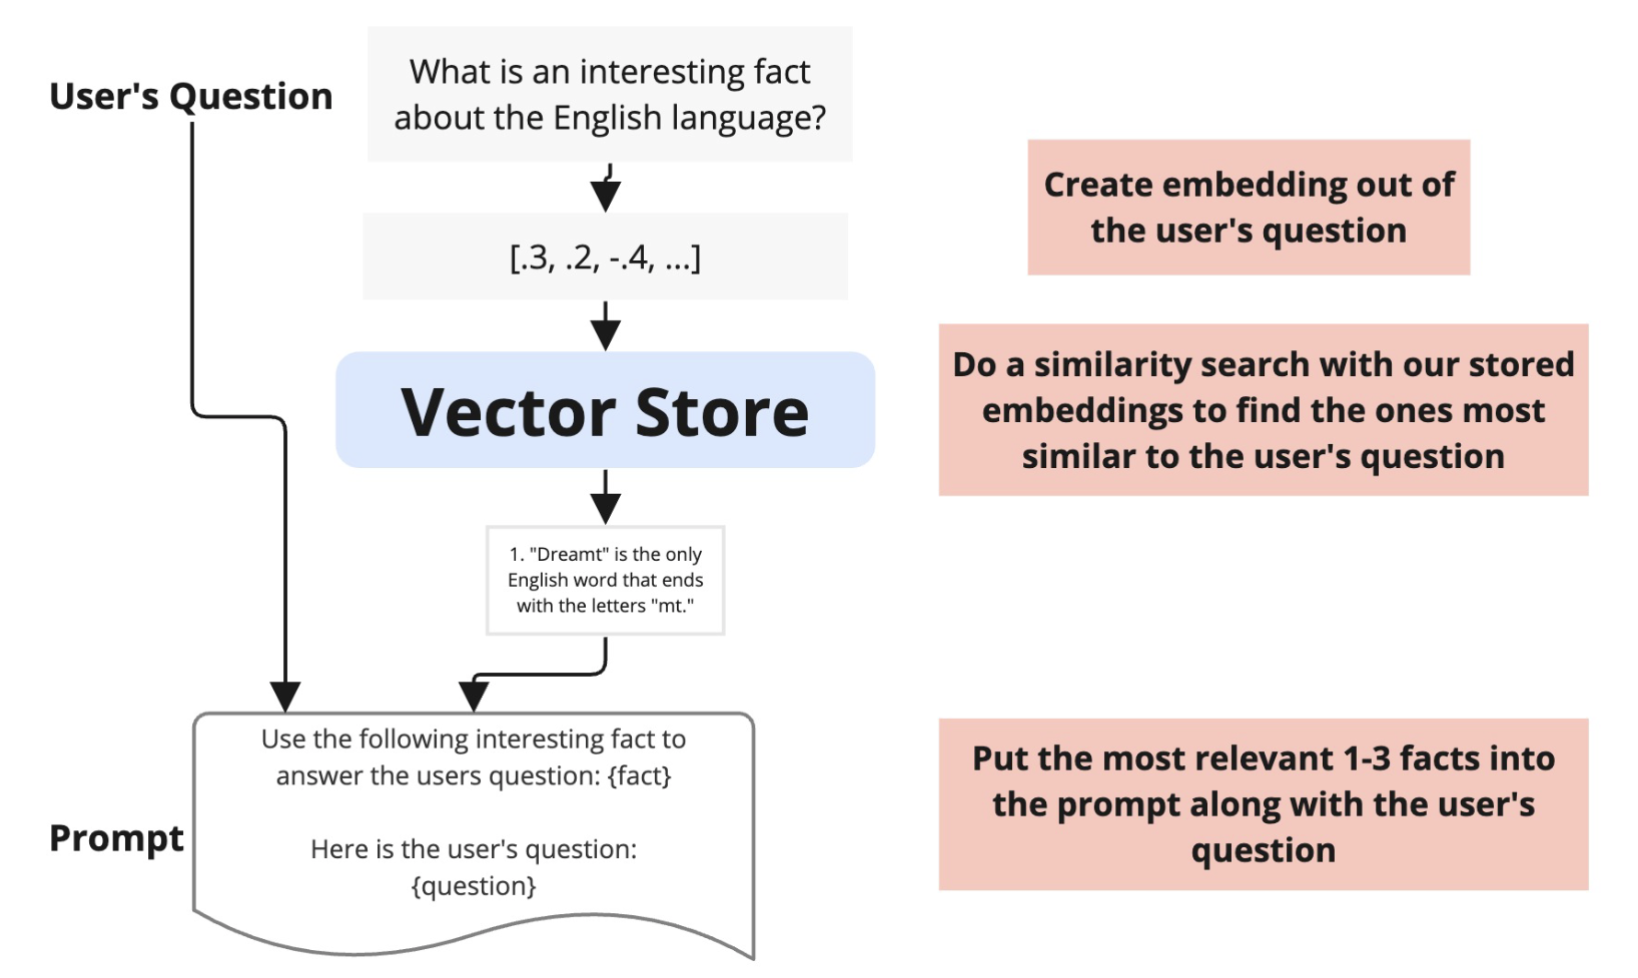

- Retriever: langchain 方便有一個接口, 對應不同DB
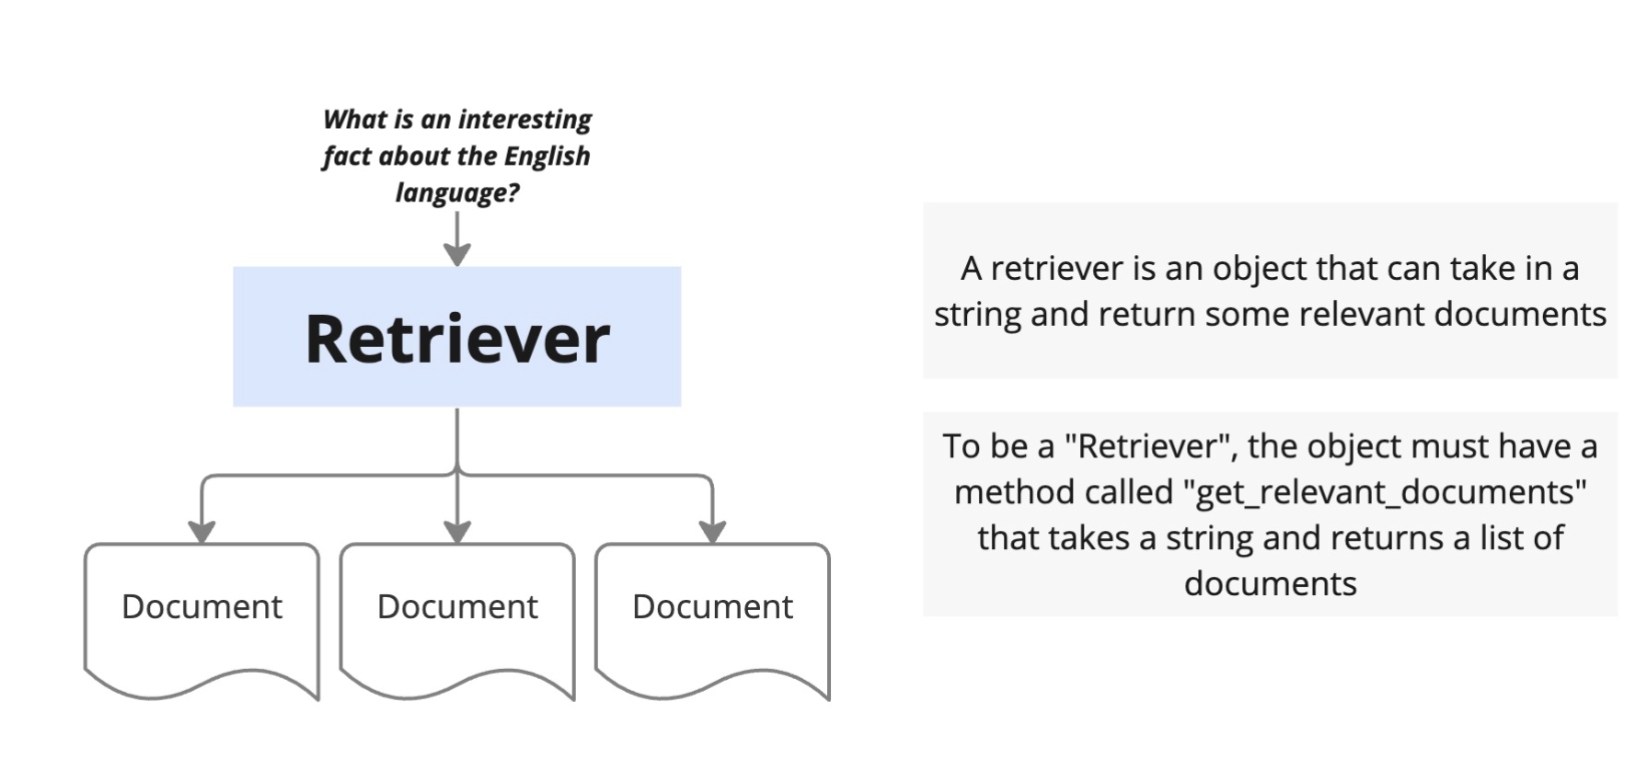
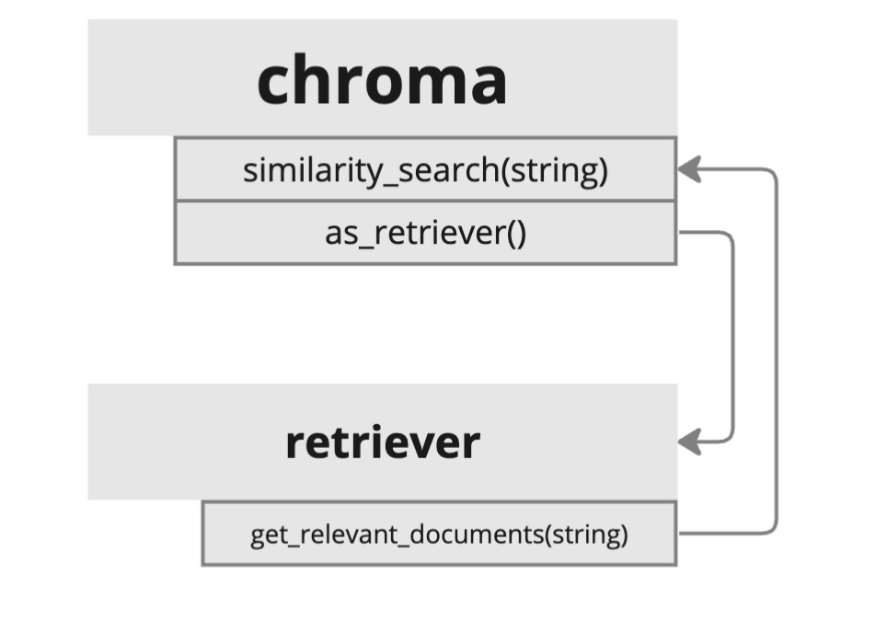

- chain_type=stuff
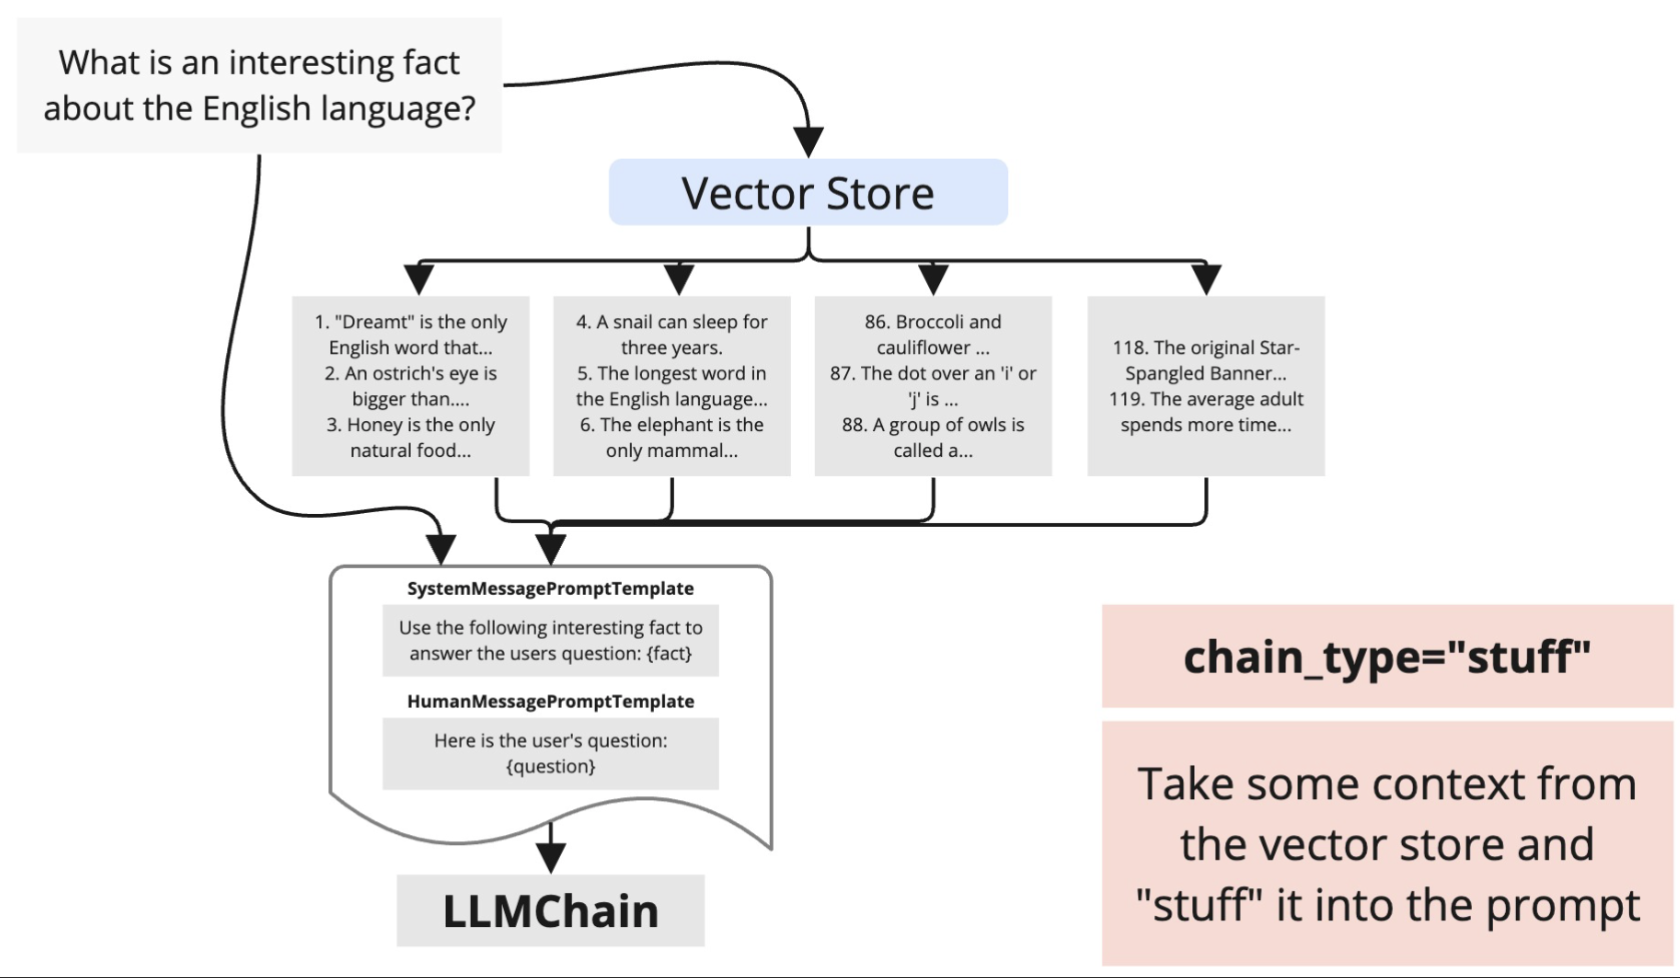

In [2]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores.chroma import Chroma 
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

chat= ChatOpenAI()
embeddings = OpenAIEmbeddings()

db=Chroma(
    embedding_function=embeddings,
    persist_directory="emb"
)

retriever = db.as_retriever()

chain = RetrievalQA.from_chain_type(
    llm=chat,
    retriever=retriever,
    chain_type="stuff"
)

result = chain.run("What is an interesting fact about the English language?")

print(result)

/Users/babyching/Documents/personal/LLM/llm_pdf/.venv/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


An interesting fact about the English language is that the word "dreamt" is the only English word that ends with the letters "mt."
